In [106]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [107]:
path = "C:/Users/6767a/OneDrive/Desktop/"
file_path = path + "googleplaystore.csv"
data = pd.read_csv(file_path)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
data.shape

(10841, 13)

###  1 . What is the range of the size most of the apps ?

In [109]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### For two measure the range of size , the data type of size which is object must be changed to float/int .. to being it to a numerical measure

In [110]:
print(" Rnage of size of most of the apps are {}".data.Size.max()-data.Size.min())
# SO BEFORE THIS

AttributeError: 'str' object has no attribute 'data'

In [111]:
data['Size'] = data.Size.apply(lambda x: x.strip('+'))
data['Size'] = data.Size.apply(lambda x: x.replace(',', ''))

### if 'M' singnifies with Mb then K  as kb:

In [112]:
data['Size'] = data.Size.apply(lambda x: x.replace('M', '000'))
data['Size'] = data.Size.apply(lambda x: x.replace('k', ''))
data['Size'] = data.Size.replace('Varies with device', np.NaN)
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

In [113]:
data.dtypes
print(" Range of size of the apps are ",(data.Size.max()-data.Size.min())/1000,"Mb")

 Range of size of the apps are  99.999 Mb


In [114]:
data['Size'] = pd.to_numeric(data['Size'])

In [115]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 2. What approach you will implement to fill the missing values of the Size column & why

### we should observe that the size of the application varies from different sizes from MB to kb either too large or too small 

### It will be a better to drop the Rows of the column Size having Nan values because it will be not an efficient idea to  replace those values with mean or mode since the size of some apps would be too large and some of them too small.'''



In [116]:
data.dropna(subset = ['Size'], inplace=True)
#data.isnull().sum()

## 3)What is the app name having max price? 

In [117]:
data['Price'].value_counts()

0         8421
$0.99      145
$2.99      114
$1.99       66
$4.99       65
          ... 
$19.90       1
$1.75        1
$14.00       1
$4.85        1
$1.04        1
Name: Price, Length: 88, dtype: int64

### 1. we should see the data type of the column
### 2. if dollar sign or any currency sybmbol attached , strip it off
### 3. after stripping it would stil have the same data type
### 4. if mathematical calulations are to be performed then convert it to int / float 

###  one way to do it

In [118]:
def get_max_price(stripped_dollar_price):
    
    # we get a ValueError saying Unable to parse string "Everyone" at position 8792
    stripped_dollar_price['Price'] = data.Price.replace("Everyone",np.nan)
    
    stripped_dollar_price['Price'] = pd.to_numeric(stripped_dollar_price['Price'])
    print(stripped_dollar_price.loc[stripped_dollar_price['Price'].idxmax()])


#starts here    
stripped_dollar_price = data.copy()
data["Price"]= data["Price"].astype(str) 
# removing '.' 
data["Price"]= data["Price"].str.replace("$", "") 
#stripped_dollar_price['Price'] =  stripped_dollar_price.Price.apply(lambda x: x.strip('$'))

get_max_price(stripped_dollar_price)

App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                   7.3
Installs                           10,000+
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object


In [119]:
def get_max_price(stripped_dollar_price):
    stripped_dollar_price['Price'] = data.Price.replace("Everyone",np.nan)

    stripped_dollar_price['Price'] = pd.to_numeric(stripped_dollar_price['Price'])

    print(stripped_dollar_price.loc[stripped_dollar_price['Price'].idxmax()])
    
#starts here    
stripped_dollar_price = data.copy()
stripped_dollar_price['Price'] =  stripped_dollar_price.Price.apply(lambda x: x.strip('$'))

get_max_price(stripped_dollar_price)

App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                   7.3
Installs                           10,000+
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object


### 4) List top 20 apps in Game Category(Based on Number of Installation)

### first we strip the "+" sign off the Installs column 
### then filter the dataset with game condition from the category table 
### sort the filtered dataset with installs as the column

In [124]:
stripped_dollar_price = data.copy()
data["Installs"]= data["Installs"].astype(str) 
# removing '.' 
data["Installs"]= data["Installs"].str.replace("+", "") 

#data['Installs'] =  data.Installs.replace("+",'')

a = data[data['Category'] == 'GAME'].sort_values('Installs',ascending = False).iloc[:20]

Name_list = a["App"].tolist()
print(Name_list)


['Temple Run 2', 'Temple Run 2', 'Candy Crush Saga', 'Candy Crush Saga', 'Candy Crush Saga', 'Candy Crush Saga', 'Pou', 'Candy Crush Saga', 'Temple Run 2', 'Pou', 'Temple Run 2', 'Temple Run 2', 'Pou', 'Candy Crush Saga', 'Temple Run 2', 'Hide N Seek : Mini Game', 'PokerStars Play: Free Texas Holdem Poker Game', 'ARK: Survival Evolved', 'Sports Car Driving Simulator 2018', 'The Grand Way']


### 5)Is it better that developers use a concise word or words to name their app?

In [83]:
!pip install wordcloud

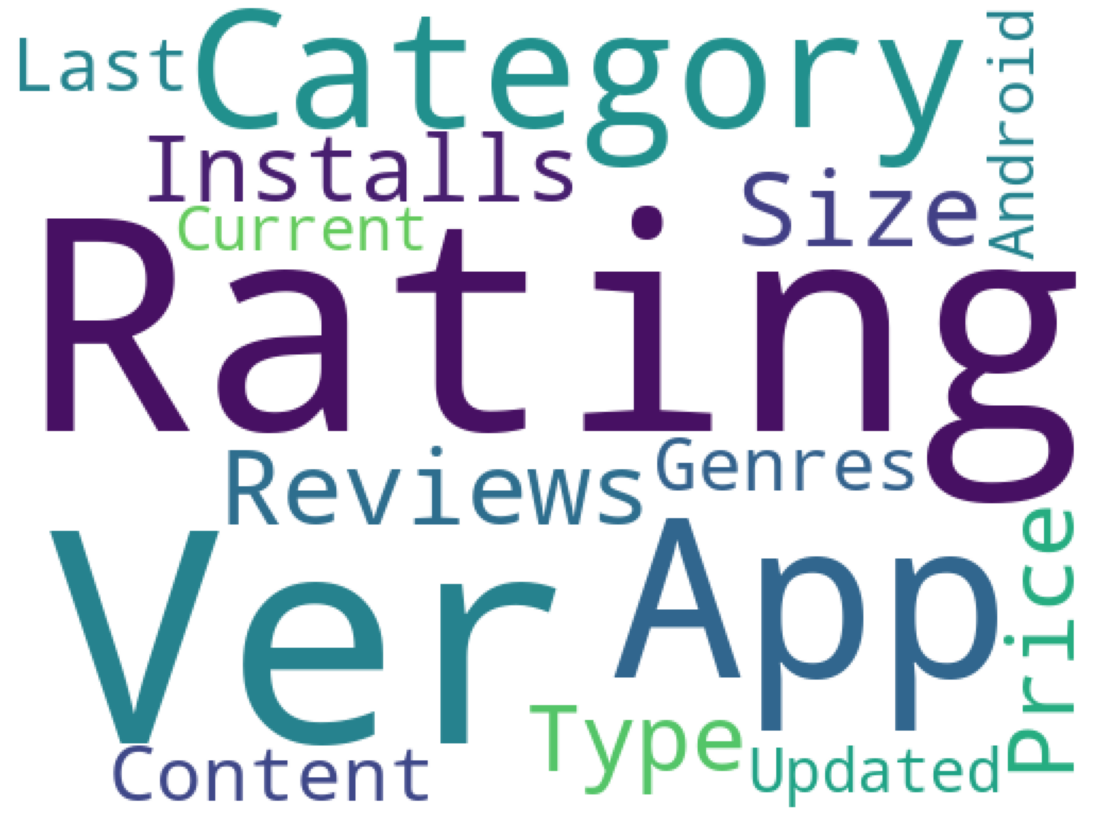

In [89]:
plt.subplots(figsize=(25,15))

wordcloud2 = WordCloud().generate(' '.join(data.App))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

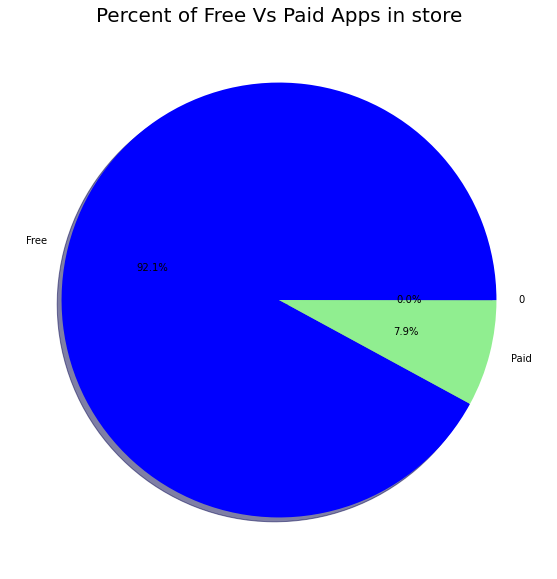

In [149]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [99]:
Paid_Apps_df = data[data['Type'] == 'Paid']


In [100]:
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]